In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy

In [2]:
from scipy.spatial import ConvexHull
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from typing import List, Set, Dict, Tuple
import time
from IPython.display import HTML

In [3]:
result = set()

In [4]:
def line_distance(a: Tuple[int, int], b: Tuple[int, int], x: Tuple[int, int]) -> int:
    '''Returns the distance between point x and the line between points a and b'''
    return abs((x[1] - a[1]) * (b[0] - a[0]) - 
               (b[1] - a[1]) * (x[0] - a[0]))

In [5]:
def search_side(a: Tuple[int, int], b: Tuple[int, int], x: Tuple[int, int]) -> int:
    '''Find the side that of point x with respect to the line that joins a and b'''
    res = (x[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (x[0] - a[0])
    if res > 0:
        return 1
    if res < 0:
        return -1
    return 0

In [6]:
def quickhull(points: List[int], length: int, a: Tuple[int, int], b: Tuple[int, int], side: int) -> None:
    '''Computes the quickhull algorithm'''
    index = -1
    max_distance = 0
    
    # Finding the point with the maximum distance
    # From the line and on the specified side of the line
    for i in range(length):
        temp = line_distance(a, b, points[i])
        
        if (search_side(a, b, points[i]) == side) and (temp > max_distance):
            index = i
            max_distance = temp
    
    # If no point is found and the points to the convex hull
    if index == -1:
        result.add("/".join(map(str, a)))
        result.add("/".join(map(str, b)))
        return
    
    # Recursive part for the next points
    quickhull(points, length, points[index], a, -search_side(points[index], a, b))
    quickhull(points, length, points[index], b, -search_side(points[index], b, a))

In [79]:
def printhull(points: List[int], length: int) -> None:
    '''Takes the input points and length of the list'''
    if (length < 3):
        print("Convex hull is not possible with too little points")
        return
    
    # Finding the point with the maximum and minimum value
    min_x = 0
    max_x = 0
    for i in range(1, length):
        if points[i][0] < points[min_x][0]:
            min_x = i
        if points[i][0] > points[max_x][0]:
            max_x = i
    
    # find points on one side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], 1)
    # find points on other side of the line between min and max x value
    quickhull(points, length, points[min_x], points[max_x], -1)
    
    print("Points in the Convex Hull:")
    convex_hull_list = []
    for element in result:
        x = element.split("/")
        convex_hull_list.append((int(x[0]), int(x[1])))
        print("(", x[0], ",", x[1], ") ", end = " ")
    xdata=[]
    ydata=[]
    for xval,yval in convex_hull_list:
        xdata.append(xval)
        ydata.append(yval)
    plt.ion() # Enable interactive mode
    fig = plt.figure()  # Create figure
    axis = plt.axes(xlim =(min(xdata)-1, max(xdata)+1), 
                ylim =(min(ydata)-1, max(ydata)+1)) 

    l, = plt.plot([],[],marker='o',linestyle='') # Plot blank data
    plt.xlabel('x')
    plt.title('test')


    def update_line(i):
        print(xdata[i], ydata[i])
        l.set_data(xdata[:i+1],ydata[:i+1])
        return l
    
    ani = matplotlib.animation.FuncAnimation(fig, update_line, 
                frames=len(xdata), interval=50, repeat=True)
    writergif = matplotlib.animation.PillowWriter(fps=1)
    ani.save('filename.gif',writer=writergif)
    plt.draw()

In [80]:
points = [[0, 5], [2, 1], [3, 2], [4, 4],
            [1, 0], [1, 6], [4, 1], [3, 3]];

<IPython.core.display.Javascript object>


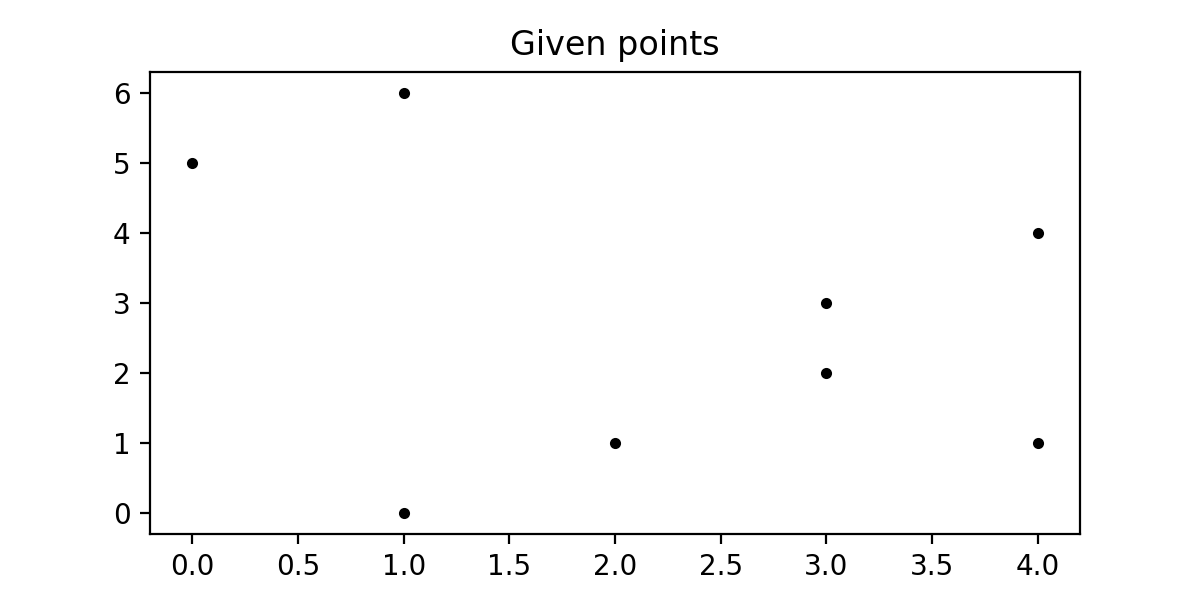

In [81]:
points = np.asarray(points)
hull = ConvexHull(points)
fig, ax = plt.subplots(ncols=1, figsize=(6, 3))
ax.plot(points[:, 0], points[:, 1], '.', color='k')
ax.set_title('Given points')
plt.show()

Points in the Convex Hull:
( 4 , 1 )  ( 1 , 0 )  ( 4 , 4 )  ( 0 , 5 )  ( 1 , 6 )  

<IPython.core.display.Javascript object>


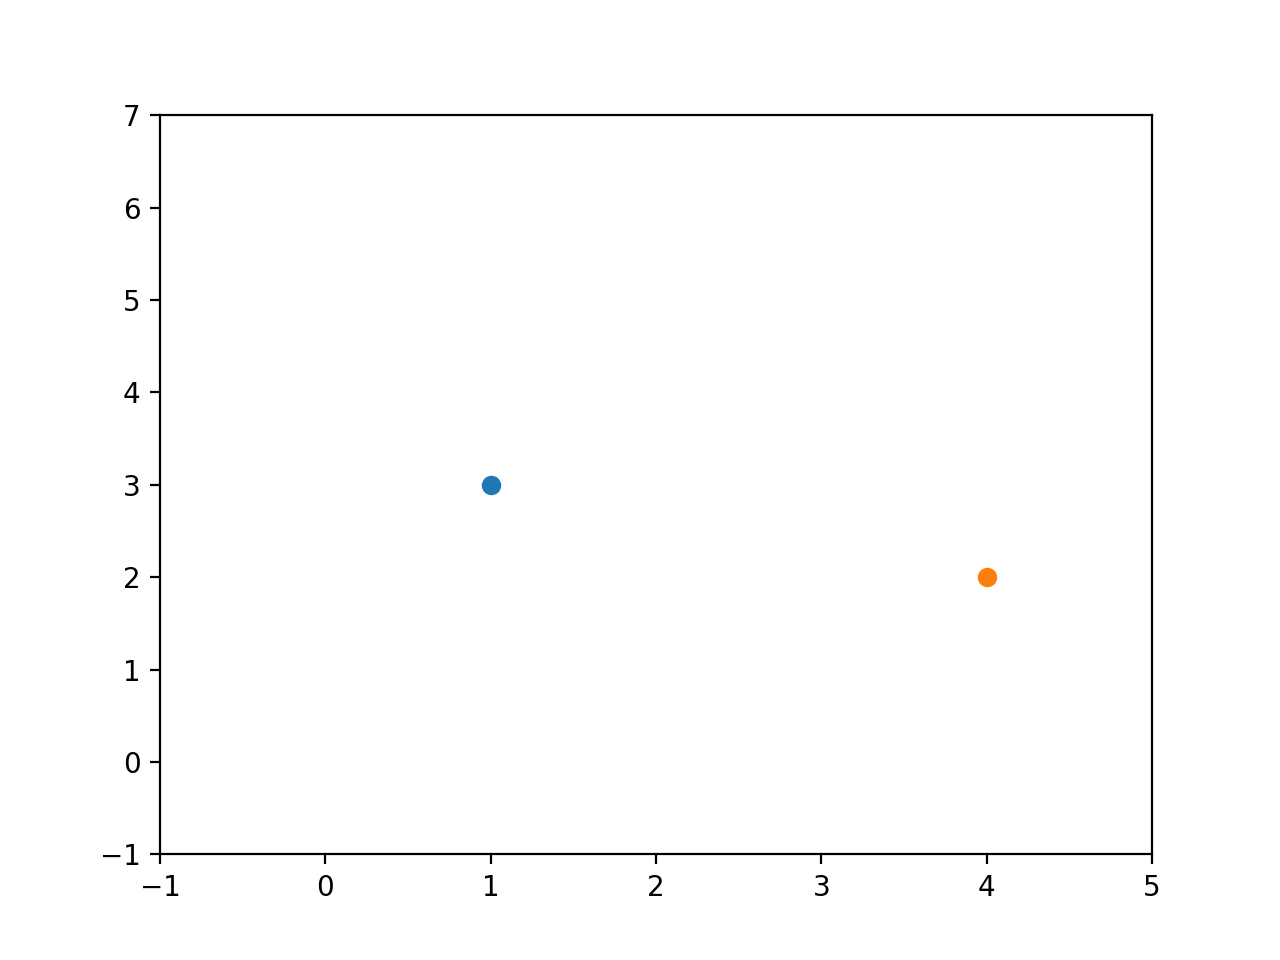

ValueError: too many values to unpack (expected 1)

In [82]:
length = len(points)
printhull(points, length)

In [ ]:
points = np.asarray(points)
hull = ConvexHull(points)
for plot_id in (1, 2):
    fig, ax = plt.subplots(ncols=1, figsize=(10, 6))
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if plot_id == 1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'mediumpurple')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='purple', color='none', lw=1, markersize=10)
    plt.show()